# <center> Earthquakes over time dashboard </center>

This notebook demonstrates how developers can quickly build dashboard style apps using Jupyter notebook and ArcGIS API for Python. To run this you need `jupyter-dashboard` installed in your `conda` environment.

In [23]:
#import libraries
from arcgis.gis import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from datetime import datetime
from dateutil import parser

## Access earthquakes feature layer

<Item title:"earthquakes" type:Feature Layer Collection owner:arcgis_python>
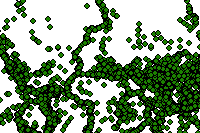

In [3]:
gis = GIS("https://python.playground.esri.com/portal","arcgis_python","amazing_arcgis_123")
eq_item = gis.content.search("title:earthquakes & owner:arcgis_python", "feature layer")[0]
eq_item

In [4]:
eq_flayer = eq_item.layers[0]
eq_fset = eq_flayer.query()
eq_df = eq_fset.df
eq_df.head()

,datetime_,depth,distance,eventid,gap,latitude,longitude,magnitude,magtype,nbstations,objectid,rms,source,SHAPE
0,1898/06/29 18:36:00.00,0.0,None,None,None,52.00,172.0,7.6,ML,0.0,1,None,AK,"{'x': 19146952.416399997, 'y': 6800125.454400003}"
1,1898/10/11 16:37:32.70,0.0,None,None,None,50.71,-179.5,6.9,ML,0.0,2,None,AK,"{'x': -19981848.597399995, 'y': 6570155.513000..."
2,1899/07/14 13:32:00.00,0.0,None,None,None,60.00,-150.0,7.2,ML,0.0,3,None,AK,"{'x': -16697923.618999999, 'y': 8399737.889800..."
3,1899/09/04 00:22:00.00,25.0,None,None,None,60.00,-142.0,8.3,ML,0.0,4,None,AK,"{'x': -15807367.692599999, 'y': 8399737.889800..."
4,1899/09/04 04:40:00.00,0.0,None,None,None,60.00,-142.0,6.9,ML,0.0,5,None,AK,"{'x': -15807367.692599999, 'y': 8399737.889800..."


In [5]:
eq_df.shape

(77037, 14)

In [6]:
type(eq_df)

arcgis.features._data.geodataset.geodataframe.SpatialDataFrame

#### Parse datetime_ column to Python DateTime obj

In [26]:
eq_df['new_datetime'] = eq_df['datetime_'].apply(lambda x: parser.parse(x))

In [28]:
# eq_df.to_csv('earthquakes_newdt.csv')

### Plot the number and intensity of hurricanes over time

In [35]:
eq_years = eq_df['new_datetime'].apply(lambda x : x.year)

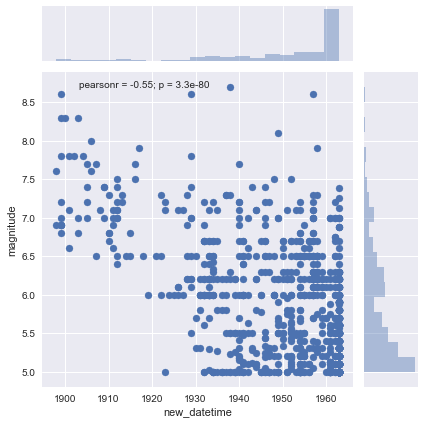

In [34]:
eq_small = eq_df.head(1000)
sns.jointplot(eq_small['new_datetime'].apply(lambda x: x.year), eq_small['magnitude'])

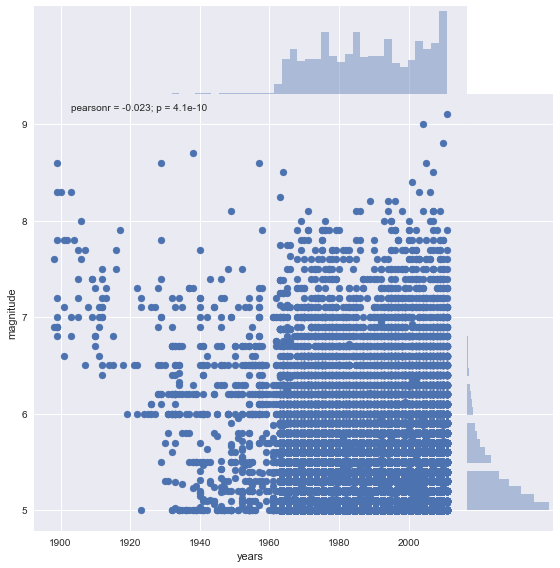

In [51]:
g1 = sns.jointplot(eq_years, eq_df['magnitude'], size=8, space=0)
g1.set_axis_labels(xlabel='years', ylabel='magnitude')
g1

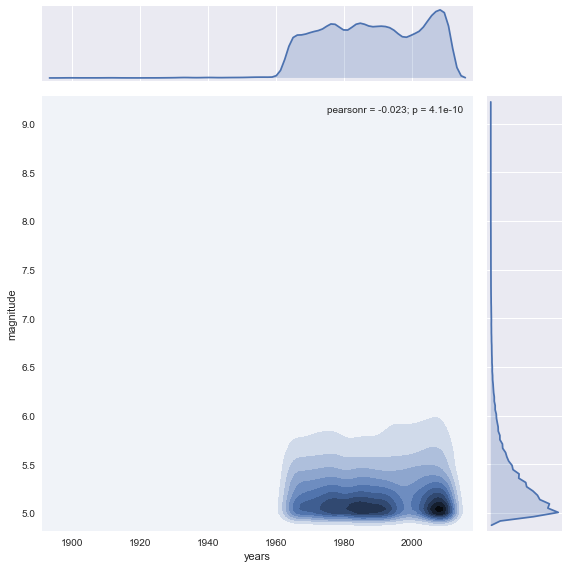

In [50]:
g2 = sns.jointplot(eq_years, eq_df['magnitude'], kind='kde', size=8)
g2.set_axis_labels(xlabel='years', ylabel= 'magnitude')
g2

## Get finer picture

In [48]:
eq_years.max()

2011

In [53]:
from ipywidgets import widgets

In [54]:
widgets.IntSlider()

In [57]:
w1 = widgets.IntRangeSlider(
    value=[1980, 1990],
    min=1900,
    max=2010,
    step=10,
    description='10 year intervals: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i',
)
w1

In [61]:
w1.value

(1920, 1960)

## Throw in the map

In [62]:
map1 = gis.map()
map1

In [64]:
map1.add_layer(eq_item)

In [67]:
map1.set_time_extent('1890','1900')

In [69]:
map1.extent

In [75]:
map1.get_state()

{'_addlayer': '{"type": "FeatureLayer", "url": "http://python.playground.esri.com/server/rest/services/Hosted/earthquakes/FeatureServer/0?token=2bfMoQtwW8feO4gkf0Xt9Zy1KBviMbLWV6gPBQ2ugwZGzjjdGkIpdyBKdqc7OO-omlSX8YO0i4CkPsIG_KVeyOyZWLQMBmc99GWsYq46mdFhvMb0SRTvrtOQOKURjZcU"}',
 '_arcgis_url': 'https://python.playground.esri.com/portal/sharing/rest/content/items',
 '_dom_classes': (),
 '_extent': '',
 '_jsextent': '',
 '_model_module': 'jupyter-js-widgets',
 '_model_module_version': '*',
 '_model_name': 'DOMWidgetModel',
 '_swipe_div': 'swipeDivIF819O',
 '_token_info': '{"server": "https://python.playground.esri.com/portal/sharing/rest/", "tokenurl": "https://python.playground.esri.com/portal/sharing/rest/generateToken", "username": "arcgis_python", "password": "amazing_arcgis_123"}',
 '_view_module': 'mapview',
 '_view_module_version': '*',
 '_view_name': 'MapView',
 'basemap': 'topo',
 'center': [0, 0],
 'end_time': '1900',
 'id': '',
 'layout': 'IPY_MODEL_914a8d374337435589edacd805e08

## time try

In [76]:
gis2 = GIS()
ls_water = gis2.content.search("Land Water Boundary (453) 1990-2010", 
                               max_items=1, outside_org = True)[0]

In [77]:
ls_water

<Item title:"Land / Water Boundary (453) 1990-2010 (Mature Support)" type:Imagery Layer owner:esri>

In [78]:
map2 = gis.map()
map2

In [79]:
map2.add_layer(ls_water)

In [85]:
map2.set_time_extent('1/1/2004 UTC', '1/1/2005 UTC')

In [91]:
w2 = widgets.IntSlider(value=2005,
    min=1990,
    max=2010,
    step=1,
    description='1 year intervals: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i',
)
w2

AttributeError: 'str' object has no attribute 'value'

In [92]:
def on_slider_move(b):
    print(b.value)
w2.on_trait_change(on_slider_move)

/Users/atma6951/anaconda/envs/geosaurus_gold/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: on_trait_change is deprecated in traitlets 4.1: use observe instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
w2.value

2005